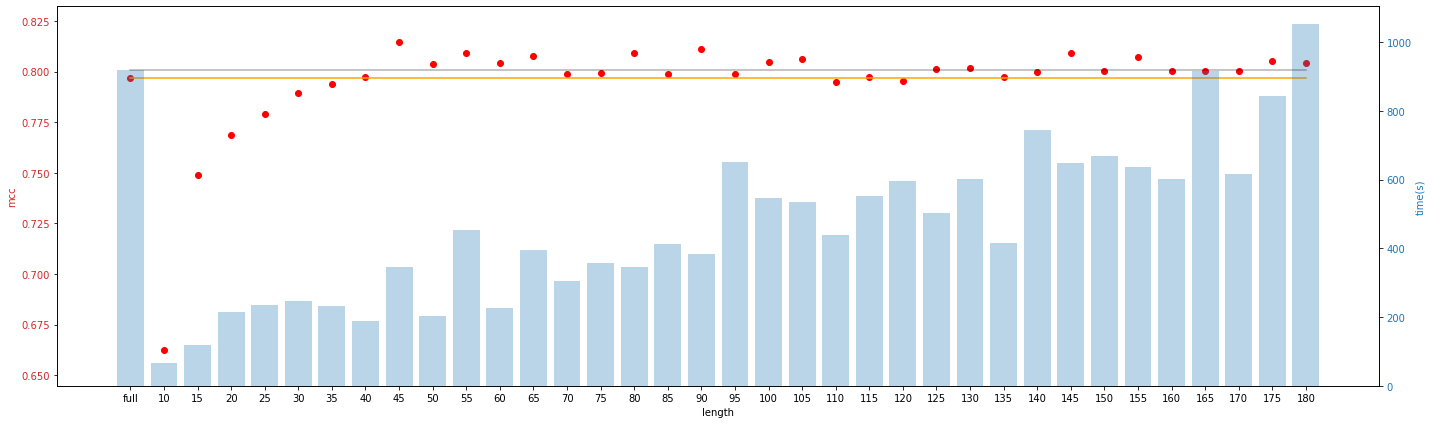

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

x = []
acc = []
mccstd = []
auc = []
mcc = []
epoch = []
time = []
timestd = []

neuron = 'lstm'

with open(f'./log/{neuron}/full/all.log', 'r') as f:
    log = [v.rstrip('\n') for v in f.readlines()]
x.append('full')
acc.append(float(log[0][15:]))

auc.append(float(log[2][15:]))
mcc.append(float(log[4][15:]))
mccstd.append(float(log[5][14:]))
epoch.append(float(log[6][15:]))
time.append(float(log[7][14:]))
timestd.append(float(log[8][14:]))

for i in range(10, 181, 5):
    with open(f'./log/{neuron}/resample/segment-1/{i}.all.log', 'r') as f:
        log = [v.rstrip('\n') for v in f.readlines()]
    x.append(f'{i}')
    acc.append(float(log[0][15:]))
    auc.append(float(log[2][15:]))
    mcc.append(float(log[4][15:]))
    mccstd.append(float(log[5][14:]))
    epoch.append(float(log[6][15:]))
    # time.append(float(log[7][14:]))
    time.append(float(log[9][18:]))
    timestd.append(float(log[10][18:]))

# for i in range(10, 181, 5):
#     with open(f'./log/{neuron}/non_resample/segment-1/{i}.all.log', 'r') as f:
#         log = [v.rstrip('\n') for v in f.readlines()]
#     x.append(f' {i}')
#     acc.append(float(log[0][15:]))
#     auc.append(float(log[2][15:]))
#     mcc.append(float(log[4][15:]))
#     epoch.append(float(log[6][15:]))
#     time.append(float(log[7][14:]))

fig, ax1 = plt.subplots(figsize=(20, 6))
color = 'tab:red'
ax1.set_xlabel('length')
# for label in ax1.get_xticklabels():
#     label.set_rotation(45) 
ax1.set_ylabel('mcc', color=color)
ax1.scatter(x, mcc, color='red')
ax1.plot(x, [mcc[0]]*len(x), color='orange')
# ax1.scatter(x, auc, color='orange')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([0.55, 0.69])
# ax1.set_yticks([])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('time(s)', color=color)  # we already handled the x-label with ax1
ax2.bar(x, time, color=color, alpha=0.3)
ax2.plot(x, [time[0]]*len(x), color='black', alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yticks([])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.clf()